In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
train_data = pd.read_csv('/Users/raghavgarg/Downloads/titanic/train.csv')
test_data=pd.read_csv("/Users/raghavgarg/Downloads/titanic/test.csv")
# Preview the data
print("Train Data:")
train_data.head()

Train Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Ensure all columns align with the provided columns
print("Train Columns:", train_data.columns)
print("Test Columns:", test_data.columns)

# Feature Engineering: Family size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

# Data Cleaning: Handle missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

Train Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test Columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [4]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

In [5]:
# Drop rows with missing `Embarked` values in both datasets
train_data = train_data.dropna(subset=['Embarked'])
test_data = test_data.dropna(subset=['Embarked'])
train_data = train_data.dropna(subset=['Cabin'])
test_data = test_data.dropna(subset=['Cabin'])


In [6]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')


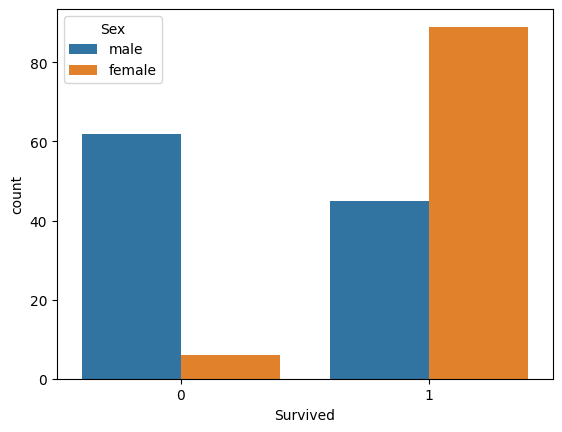

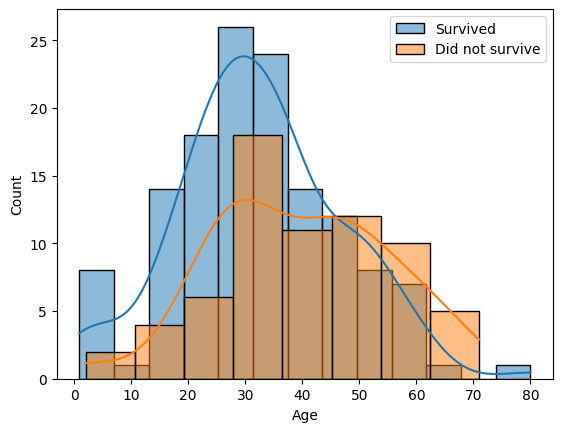

In [7]:
print(train_data.columns)
# Visualize survival rate based on sex
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.show()
# Age distribution for survivors and non-survivors
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], kde=True, label='Survived')
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], kde=True, label='Did not survive')
plt.legend()
plt.show()

In [8]:
# Splitting the training data into features and target
# Encode the Gender column
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'S': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'S': 1})
# Drop columns that won't be used in modeling
train_data = train_data.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin'])
test_data = test_data.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin'])

X = train_data.drop(columns='Survived')
y = train_data['Survived']

In [9]:
# Train-test split for model evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train",X_train.isnull().sum())
print("y_train",y_train.isnull().sum())

X_train Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      3
FamilySize    0
dtype: int64
y_train 0


In [10]:
import numpy as np

# Identify rows with missing 'Embarked' values
missing_embarked_idx = X_train[X_train['Embarked'].isnull()].index

# Replace missing values randomly with 'C' or 'S'
X_train.loc[missing_embarked_idx, 'Embarked'] = np.random.choice([0, 1], size=len(missing_embarked_idx), replace=True)

# Verify no missing values remain
print(X_train['Embarked'].isnull().sum())  # Should print 0


0


In [11]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
print("X_val",X_val.isnull().sum())
print("y_val",y_val.isnull().sum())

X_val Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      1
FamilySize    0
dtype: int64
y_val 0


In [14]:
import numpy as np

# Identify rows with missing 'Embarked' values
missing_embarked_idx = X_val[X_val['Embarked'].isnull()].index

# Replace missing values randomly with 'C' or 'S'
X_val.loc[missing_embarked_idx, 'Embarked'] = np.random.choice([0, 1], size=len(missing_embarked_idx), replace=True)

# Verify no missing values remain
print(X_val['Embarked'].isnull().sum())  # Should print 0


0


In [15]:
# Predictions on validation set
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.8293



Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.91      0.88      0.89        33

    accuracy                           0.83        41
   macro avg       0.73      0.75      0.74        41
weighted avg       0.84      0.83      0.83        41


Confusion Matrix:


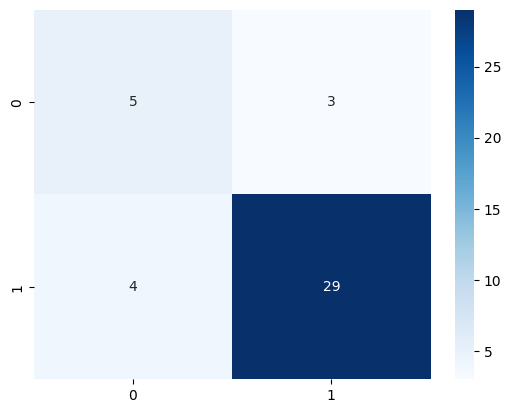

In [16]:
# Detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [18]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      1
FamilySize    0
dtype: int64

In [19]:
import numpy as np

# Identify rows with missing 'Embarked' values
missing_embarked_idx = test_data[test_data['Embarked'].isnull()].index

# Replace missing values randomly with 'C' or 'S'
test_data.loc[missing_embarked_idx, 'Embarked'] = np.random.choice([0, 1], size=len(missing_embarked_idx), replace=True)

# Verify no missing values remain
print(test_data['Embarked'].isnull().sum())  # Should print 0


0


In [20]:
# Predictions on the test set
predictions = model.predict(test_data)

# Create the submission dataframe
submission = pd.DataFrame({
    'PassengerId': range(1, len(test_data) + 1),  # Generate Passenger IDs as they're not in the test columns
    'Survived': predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'
